In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
%matplotlib inline
sns.set(style='ticks', font_scale=1.7)

In [2]:
def progonka(a, b, c, f):
    """
    Метод прогонки
    :param a: диагональ, лежащая под главной (size = n-1)
    :param b: главная диагональ (size = n)
    :param c: диагональ, лежащая над главной (size = n-1)
    :param f: вектор свободных членов (size = n)
    :return: вектор неизвестых y
    """
    n = len(f)
    alpha = np.zeros(n-1)
    beta = np.zeros(n)
    alpha[0] = c[0] / b[0]
    beta[0] = f[0] / b[0]

    # прямая прогонка
    for i in range(1, n-1):
        alpha[i] = c[i] / (b[i] - a[i-1]*alpha[i-1])
        beta[i] = (f[i] - a[i-1]*beta[i-1]) / (b[i] - a[i-1]*alpha[i-1])
    
    beta[n-1] = (f[n-1] - a[-1]*beta[n-2]) / (b[n-1] - a[-1]*alpha[-1])
    
    # обратная прогонка
    y = np.zeros(n)
    y[-1] = beta[-1]
    
    for i in range(n-2, -1, -1):
        y[i] = beta[i] - alpha[i] * y[i+1]
        
    return y

In [3]:
L = 3.14
T = 5

h = 1e-2
tau = 1e-3

a1 = 1

n_x = int(L / h) + 1
n_t = int(T / tau) + 1

u = np.zeros((n_t, n_x))

In [4]:
x = np.arange(0, L+h, h)
t = np.arange(0, T+tau, tau)
dx = np.zeros(n_x)
dx[:] = h
dt = np.zeros(n_t)
dt[:] = tau

In [5]:
def initial(x):
    return 0.1 * np.sin(x)

In [6]:
# начальные условия:
u[0, :] = initial(x)
u[1, :] = u[0, :]  # тк производная равна 0
# граничные условия:
u[:, 0] = 0
u[:, -1] = 0
# pd.DataFrame(u)

In [7]:
a = np.zeros(n_x)  # a[0] не используется
b = np.zeros(n_x)
c = np.zeros(n_x)  # c[-1] не используется
f = np.zeros(n_x)
a[0] = 0
c[-1] = 0

b[0] = 1
b[-1] = 1
a[-1] = 0

f[0] = 0
f[-1] = 0

for n in tqdm(range(1, n_t-1)):
    for i in range(1, n_x-1):
        # коэффициенты с учетом того что сетка равномерная
        a[i] = (a1**2) / (h**2)
        b[i] = - ( (1/tau**2) + 2*a[i] )
        c[i] = a[i]
        f[i] = - (2*u[n, i] - u[n-1, i]) / (tau**2)
        
    u[n+1, :] = progonka(a[1:], b, c[:-1], f)
              

  0%|          | 0/4999 [00:00<?, ?it/s]

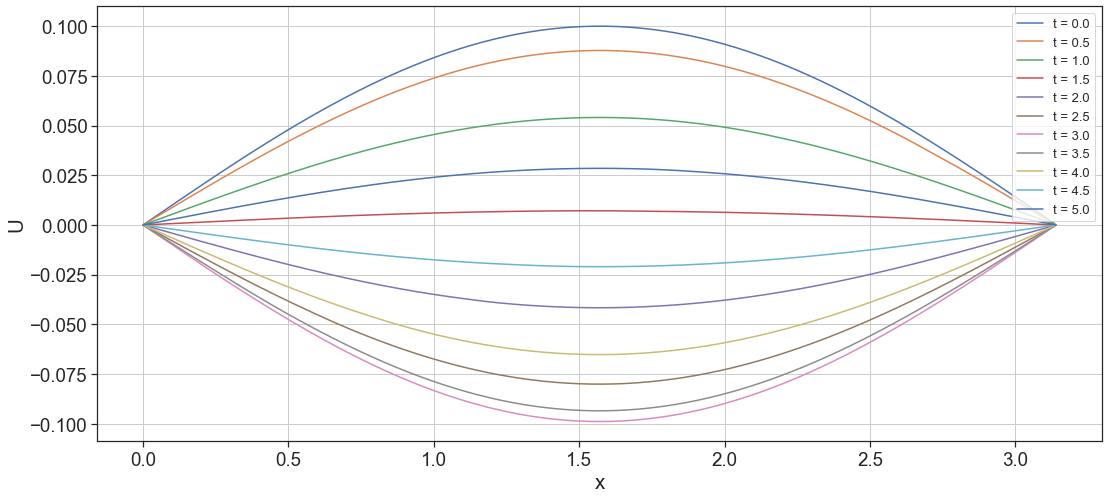

In [8]:
t_view = np.arange(0, 5.5, 0.5)

plt.figure(figsize=(18, 8))

for i in range(len(t_view)):
    index = np.where(np.abs(t - t_view[i]) <= 1e-6)[0][0]
    plt.plot(x, u[index, :], label=f't = {t_view[i]}')
    
plt.xlabel('x')
plt.ylabel('U')
plt.legend(loc='upper right', fontsize=13)
plt.grid()